### Q1. Regression and out-of-distribution prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

Pre-processing and visualizing the data

In [2]:
#reading the .csv file of red-wine data
dfr = pd.read_csv("winequality-red.csv", sep = ";")
dfr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
dfr.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [4]:
#reading the .csv file for white-wine data
dfw = pd.read_csv("winequality-white.csv", sep = ";")
dfw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [5]:
dfw.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


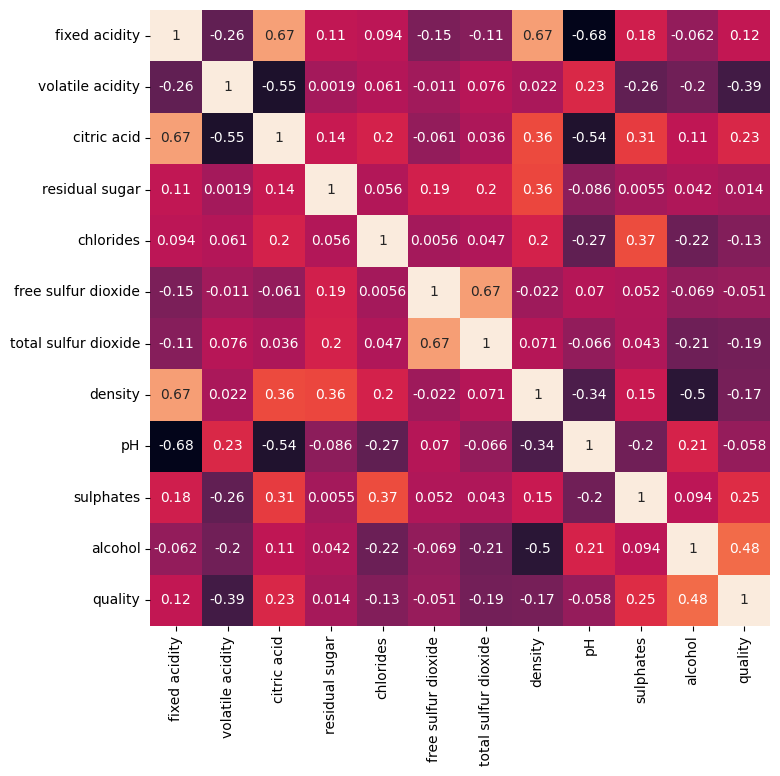

In [6]:
#plotting the correlation matrix of red-wine using heat-map
plt.figure(figsize=(8, 8))
sb.heatmap(dfr.corr(), annot=True, cbar=False)
plt.show()

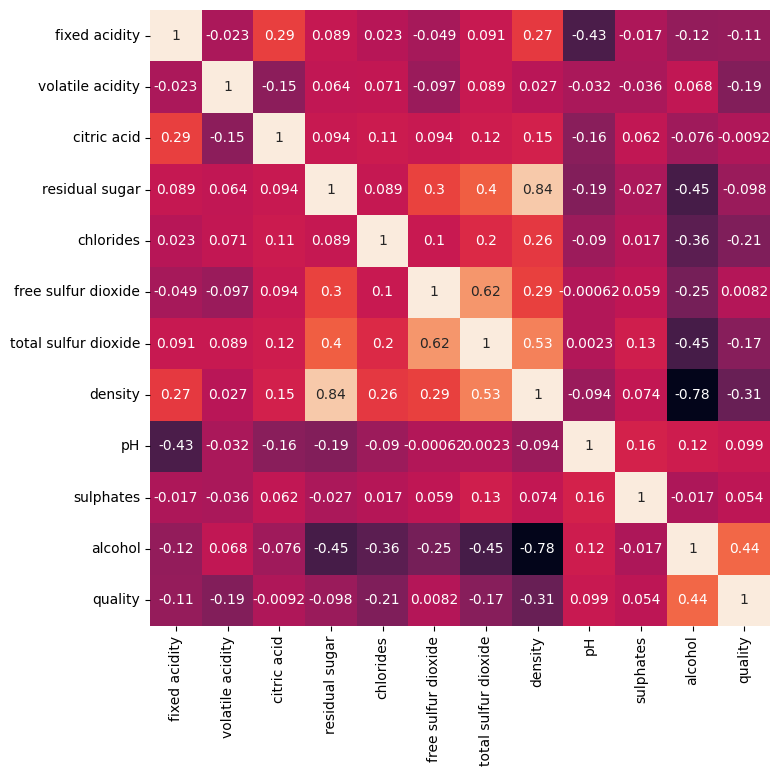

In [7]:
#plotting the correlation matrix of white-wine using heat-map
plt.figure(figsize=(8, 8))
sb.heatmap(dfw.corr(), annot=True, cbar=False)
plt.show()

In [8]:
#'quality' feature is removed from the data-frame
#to use it as a target variable
Xr = dfr.drop('quality', axis = 1)
yr = dfr['quality']

Xw = dfw.drop('quality', axis = 1)
yw = dfw['quality']

In [9]:
#splitting the data for training and testing purpose
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, train_size=0.8, random_state=42)
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, train_size=0.8, random_state=42)

Xr_train.shape, Xr_test.shape
Xw_train.shape, Xw_test.shape

((3918, 11), (980, 11))

Performing Regression using Random Forest (with hyperparameter tuning)

In [10]:
#regression using Random Forest

estimators = [100, 200, 300, 400, 500]

for e in estimators:
    regressor_rf_r = RandomForestRegressor(random_state=0, n_estimators=e, oob_score=True).fit(Xr_train, yr_train)
    regressor_rf_w = RandomForestRegressor(random_state=0, n_estimators=e, oob_score=True).fit(Xw_train, yw_train)

    prediction_r = regressor_rf_r.predict(Xr_test)
    prediction_w = regressor_rf_w.predict(Xw_test)

    mse_r = mean_squared_error(yr_test, prediction_r)
    mse_w = mean_squared_error(yw_test, prediction_w)

    print("Hyperparameter n_estimators : ", e)
    print("MSE of red-wine regression : ", mse_r)
    print("MSE of white-wine regression : ", mse_w)
    print("\n")

Hyperparameter n_estimators :  100
MSE of red-wine regression :  0.310995625
MSE of white-wine regression :  0.343205306122449


Hyperparameter n_estimators :  200
MSE of red-wine regression :  0.307009375
MSE of white-wine regression :  0.34032438775510204


Hyperparameter n_estimators :  300
MSE of red-wine regression :  0.30819680555555556
MSE of white-wine regression :  0.34064447845804985


Hyperparameter n_estimators :  400
MSE of red-wine regression :  0.30809296875000003
MSE of white-wine regression :  0.3414025956632653


Hyperparameter n_estimators :  500
MSE of red-wine regression :  0.3097668625
MSE of white-wine regression :  0.3409543795918367




In [11]:
regressor_rf_r = RandomForestRegressor(random_state=0, n_estimators=200, oob_score=True).fit(Xr_train, yr_train)
regressor_rf_w = RandomForestRegressor(random_state=0, n_estimators=200, oob_score=True).fit(Xw_train, yw_train)

Performing Regression using Support Vector Machine (with hyperparameter tuning)


Source - 

1. https://www.geeksforgeeks.org/support-vector-regression-svr-using-linear-and-non-linear-kernels-in-scikit-learn/


2. https://medium.com/@eskandar.sahel/introduction-to-rbf-svm-a-powerful-machine-learning-algorithm-for-non-linear-data-1d1cfb55a1a

In [13]:
#regression using SVM (RBF Kernel)
C = [10, 50, 100, 150, 200]

for c in C:
    regressor_svm_r = SVR(kernel='rbf', C = c, epsilon=0.3).fit(Xr_train, yr_train)
    regressor_svm_w = SVR(kernel='rbf', C = c, epsilon=0.1).fit(Xw_train, yw_train)

    predict_r = regressor_svm_r.predict(Xr_test)
    predict_w = regressor_svm_w.predict(Xw_test)

    mse_r = mean_squared_error(yr_test, predict_r)
    mse_w = mean_squared_error(yw_test, predict_w)

    print("Hyperparameter C : ", c)
    print("MSE of red-wine regression : ", mse_r)
    print("MSE of white-wine regression : ", mse_w)
    print("\n")

Hyperparameter C :  10
MSE of red-wine regression :  0.45164790279969075
MSE of white-wine regression :  0.569807138280815


Hyperparameter C :  50
MSE of red-wine regression :  0.40784279893781505
MSE of white-wine regression :  0.552452340407952


Hyperparameter C :  100
MSE of red-wine regression :  0.39054176990770284
MSE of white-wine regression :  0.552141788649295


Hyperparameter C :  150
MSE of red-wine regression :  0.3851896589963414
MSE of white-wine regression :  0.5595937266952514


Hyperparameter C :  200
MSE of red-wine regression :  0.3807786458994582
MSE of white-wine regression :  0.5650683159019423




In [14]:
regressor_svm_r = SVR(kernel='rbf', C=100, epsilon=0.3).fit(Xr_train, yr_train)
regressor_svm_w = SVR(kernel='rbf', C=100, epsilon=0.1).fit(Xw_train, yw_train)

predict_r = regressor_svm_r.predict(Xr_test)
predict_w = regressor_svm_w.predict(Xw_test)

mse_r = mean_squared_error(yr_test, predict_r)
mse_w = mean_squared_error(yw_test, predict_w)

print("MSE of red-wine regression : ", mse_r)
print("MSE of white-wine regression : ", mse_w)

MSE of red-wine regression :  0.39054176990770284
MSE of white-wine regression :  0.552141788649295


Testing red-wine data on white-wine model and vice-versa.

In [15]:
#testing red-wine data on white-wine model, and
#white-wine data on red-wine model

prediction_r = regressor_rf_w.predict(Xr_test) #red-wine data tested on white-wine model
prediction_w = regressor_rf_r.predict(Xw_test) #white-wine data tested on red-wine model


mse_r = mean_squared_error(yr_test, prediction_r)
mse_w = mean_squared_error(yw_test, prediction_w)


print("Hyperparameter n_estimators : ", 100)
print("MSE of red-wine regression : ", mse_r)
print("MSE of white-wine regression : ", mse_w)

Hyperparameter n_estimators :  100
MSE of red-wine regression :  1.157717890625
MSE of white-wine regression :  0.7589725255102041


Computing the Feature-importance

In [16]:
#source ChatGPT

feature_importance = pd.DataFrame({'Feature': Xr_train.columns, 'Importance': regressor_rf_r.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                 Feature  Importance
10               alcohol    0.277628
9              sulphates    0.151307
1       volatile acidity    0.103723
6   total sulfur dioxide    0.079862
4              chlorides    0.067837
8                     pH    0.060275
3         residual sugar    0.059253
0          fixed acidity    0.053181
7                density    0.052840
5    free sulfur dioxide    0.047205
2            citric acid    0.046889


In [17]:
feature_importance = pd.DataFrame({'Feature': Xw_train.columns, 'Importance': regressor_rf_w.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

                 Feature  Importance
10               alcohol    0.241204
1       volatile acidity    0.124774
5    free sulfur dioxide    0.116109
3         residual sugar    0.070368
8                     pH    0.070196
6   total sulfur dioxide    0.068875
4              chlorides    0.063056
7                density    0.062172
0          fixed acidity    0.062061
9              sulphates    0.061608
2            citric acid    0.059578


Deploying the RBF model to streamlit website.
Source - 

1. https://ngugijoan.medium.com/deploy-machine-learning-web-applications-with-streamlit-238b0380679d


2. https://streamlit.io/

In [20]:
import pickle

#creating pickle file to deploy the model using streamlit
#for red-wine
pickle_out = open("redwinequality.pkl","wb")
pickle.dump(regressor_rf_r, pickle_out)
pickle_out.close()

#for white wine
pickle_out = open("whitewinequality.pkl","wb")
pickle.dump(regressor_rf_w, pickle_out)
pickle_out.close()

#https://ngugijoan.medium.com/deploy-machine-learning-web-applications-with-streamlit-238b0380679d
#was used as a reference